# Machine Maintenance Data Analysis

By. Juanda Prima Sembiring

### 1. Business Domain Understanding

Given dataset contains data of 1000 machines of a factory, data collected includes some properties of the machines such as:
    - lifetime; time elapsed (in months) since machine had operated until present or can't be operated anymore (broken) 
    - broken status
    - pressure of machine while running
    - temperature of machine while running
    - team who handled each machine
    - provider; brand that produce machine

Objective: to perform data analysis which describes the cause of damaged machine. The parameters that should be achieved are:
    1. How lifetime of machines affected to make machines getting damaged.
    2. How lifetime v/s team or provider affected the machines to be damaged.
    3. Find out some more pattern out of data.
    4. Show minimum 6 graphs which shows some strong pattern.
    5. Support your findings with some real-world logic.

In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Exploration & Data Collection

In [2]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/maintenance_data.csv')
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [3]:
#size checking
df.shape

(1000, 7)

In [4]:
#checking type of features
#no identifier, all features are necessary to build the model
#doubtly, there is no unrecognized values in numeric values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
lifetime          1000 non-null int64
broken            1000 non-null int64
pressureInd       996 non-null float64
moistureInd       1000 non-null float64
temperatureInd    997 non-null float64
team              1000 non-null object
provider          1000 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
#checking categorical values (broken)
#the target is clean. there is no other values but 0 or 1
df['broken'].unique()

array([0, 1], dtype=int64)

In [6]:
#checking categorical values (team)
#data is clean
df['team'].unique()

array(['TeamA', 'TeamC', 'TeamB'], dtype=object)

In [7]:
#checking categorical values (provider)
#data is clean, no unidentified values
df['provider'].unique()

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

In [8]:
#checking numerical values
#to identifiy unidentified values in numerical.  
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


max of moistureInd (1156.49...) seems to be outlier

In [9]:
#checking outliers
#if skew is greater than 1 or less than -1 means there are outliers
#if skewness number(z): -0.1<z<0.1: normal distribution, use mean as the representation of data
#z<-0.1: right skewed, use median
#z>0.1: left skewed, use median
df.skew()

lifetime          -0.407597
broken             0.421663
pressureInd        0.117541
moistureInd       15.982324
temperatureInd    -0.070839
dtype: float64

### 3. Data Cleaning

In [10]:
#removing outliers
df = df[df.moistureInd<1000]
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,999.000000,999.000000,995.000000,999.000000,996.000000
mean,55.170170,0.396396,98.683688,110.042272,100.556923
std,26.474343,0.489394,19.889532,25.614438,19.601604
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562281,94.529427,87.643085
50%,60.000000,0.000000,97.321050,102.841390,100.544758
75%,80.000000,1.000000,112.254272,113.437037,113.545936
max,93.000000,1.000000,173.282541,199.138717,172.544140


by looking at count, we can conclude that only one data is removed. 'moistureInd' seems good to proceed

In [11]:
#checking duplicated value
df.duplicated().sum()

0

In [12]:
#checking null values
df.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

In [13]:
#replace null values based on their skewness
df.temperatureInd.fillna(df.temperatureInd.mean(),inplace=True)
df.pressureInd.fillna(df.pressureInd.median(),inplace=True)
df.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

### 4. Exploratory Analysis
### Univariate Analysis

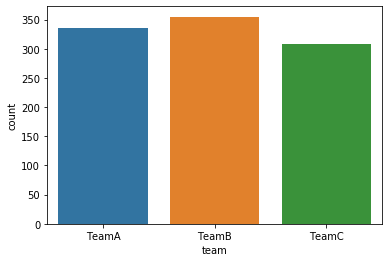

In [14]:
#categorical attributes: team
plt.figure(figsize=(6,4))
sns.countplot(x ='team', data = df, order = ('TeamA','TeamB','TeamC'))
plt.show()

Note: TeamB handle around 350 machine which has highest among all. TeamC handle around 300 machine which has lowest number among all. The tasks (to handle the machine) aren't divided equally. There are many possible reasons behind it. For example: TeamB maybe get more manpower than others, the location of machine that handled by TeamC maybe far from basecamp, etc.

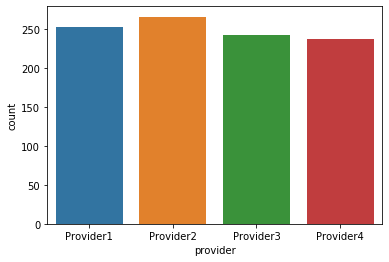

In [15]:
#categorical attributes: provider
plt.figure(figsize=(6,4))
sns.countplot(x ='provider', data = df, order = ('Provider1','Provider2','Provider3','Provider4'))
plt.show()

Note: All providers had little different in total amounts of machine provided. Provider2 has highest number slightly more than 250 while others have nearly 250 machine provided.

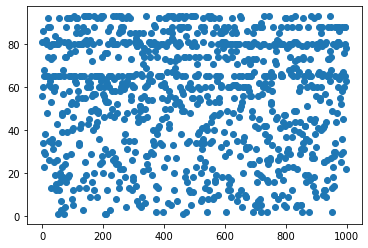

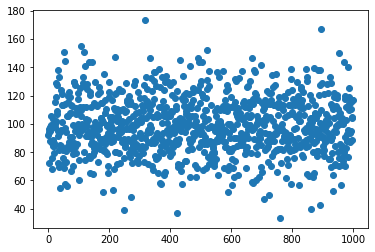

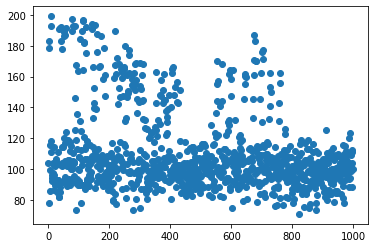

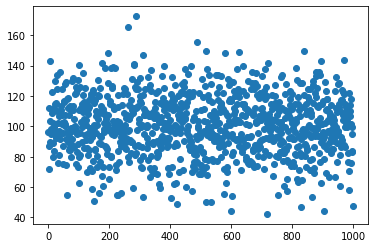

In [16]:
#numeric
for num in ['lifetime','pressureInd','moistureInd','temperatureInd']:
    plt.figure(figsize=(6,4))
    plt.scatter(df.index,df[num])
    plt.show()

Note:
- Overall, lifetime spread from 1 to more than 80. 65 and 80 are counted more than other values
- Most of machine have pressure between 80 and 120
- Most of machine have moisture between around 85 and 110
- Most of machine have temperature between 80 and 120

### Bivariate Analysis

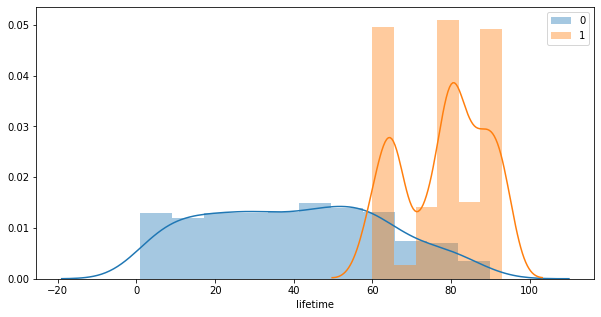

In [17]:
#numerical vs categorical
#lifetime vs broken
plt.figure(figsize=(10,5))
sns.distplot(df['lifetime'][df['broken']==0])
sns.distplot(df['lifetime'][df['broken']==1])
plt.legend(['0','1'])
plt.show()

Note: Lifetime of broken machine varied from 60 to around 95. Meanwhile, not broken machine varied from 1 to around 90. Even for old machine (lifetime higher than 60) there are 'not broken' machine. It means below 60 lifetime, there is no possibility the machine is broken. For machine which have more than 60 lifetime there is possibility either to 'broken' or 'not broken'. Machine with 60 or more lifetime have probability of broken, while machine who have less than 60 lifetime doesn't have probability of broken.

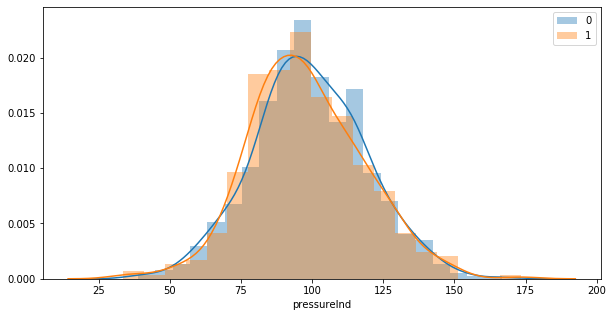

In [18]:
#numerical vs categorical
#presurre vs broken
plt.figure(figsize=(10,5))
sns.distplot(df['pressureInd'][df['broken']==0])
sns.distplot(df['pressureInd'][df['broken']==1])
plt.legend(['0','1'])
plt.show()

Note: distribution of pressure between broken (1,red graph) and not broken (0, blue) of customers are almost overlapping. It means, the probability of machines with particular pressure don't have relation with its brokenness. 

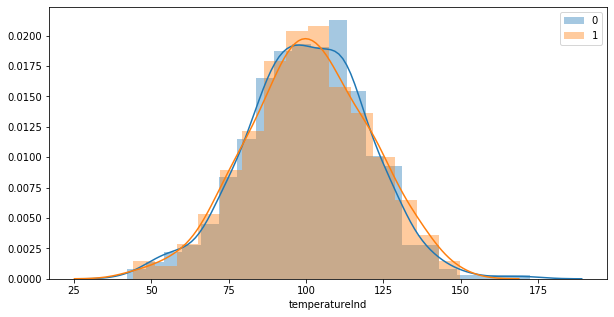

In [19]:
#numerical vs categorical
#temperature vs broken
plt.figure(figsize=(10,5))
sns.distplot(df['temperatureInd'][df['broken']==0])
sns.distplot(df['temperatureInd'][df['broken']==1])
plt.legend(['0','1'])
plt.show()

Note: distribution of temperature between broken (1,red) and not broken (0, blue) of customers are almost overlapping.It means, the probability of machines with particular temperature don't have relation with its brokenness.

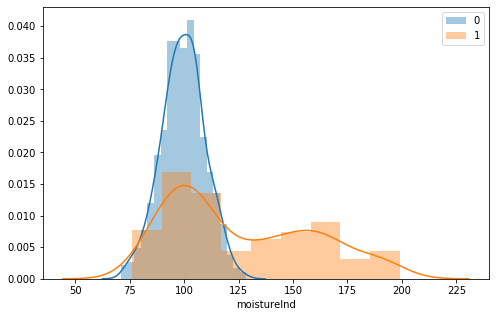

In [20]:
#numerical vs categorical
#moisture vs broken
plt.figure(figsize=(8,5))
sns.distplot(df['moistureInd'][df['broken']==0])
sns.distplot(df['moistureInd'][df['broken']==1])
plt.legend(['0','1'])
plt.show()

Note: Moisture of not broken machine range from around 70 to nearly 130. Broken machines have moisture between 75 to 200. Machine with moisture more than 130 have no possibility of running (not broken).

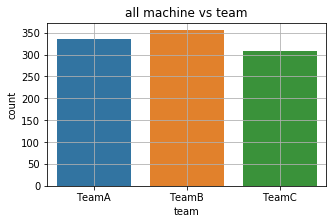

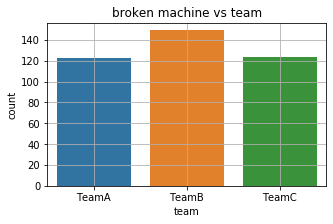

In [21]:
# categorical v/s categorical - countplot
# Team vs Broken
plt.figure(figsize=(5,3))
sns.countplot(df.team, order=('TeamA','TeamB','TeamC'))
plt.title('all machine vs team')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(df.team[df.broken==1], order=('TeamA','TeamB','TeamC'))
plt.title('broken machine vs team')
plt.grid(True)
plt.show()

In [22]:
#brokenness rate
print('teamA: ',125/340)
print('teamB: ',150/360)
print('teamC: ',125/310)

teamA:  0.36764705882352944
teamB:  0.4166666666666667
teamC:  0.4032258064516129


Team B and Team C have highest rate of brokennes with slight difference each other. Team A has lowest rate. 

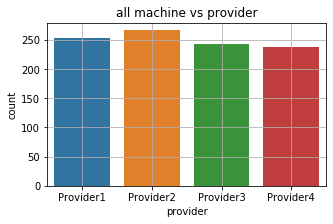

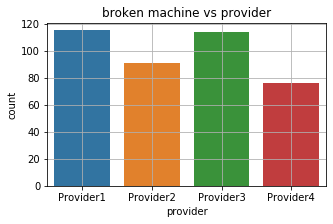

In [23]:
# Provider v/s Broken
plt.figure(figsize=(5,3))
sns.countplot(df.provider, order = ('Provider1','Provider2','Provider3','Provider4'))
plt.title('all machine vs provider')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(df.provider[df.broken==1], order = ('Provider1','Provider2','Provider3','Provider4'))
plt.title('broken machine vs provider')
plt.grid(True)
plt.show()

In [24]:
#brokenness rate
print('provider1: ',115/255)
print('provider2: ',90/270)
print('provider3: ',115/240)
print('provider4: ',75/235)

provider1:  0.45098039215686275
provider2:  0.3333333333333333
provider3:  0.4791666666666667
provider4:  0.3191489361702128


Provider 1 and 3 have higher borkenness rate while provider 2 and 4 have lower brokenness rate.

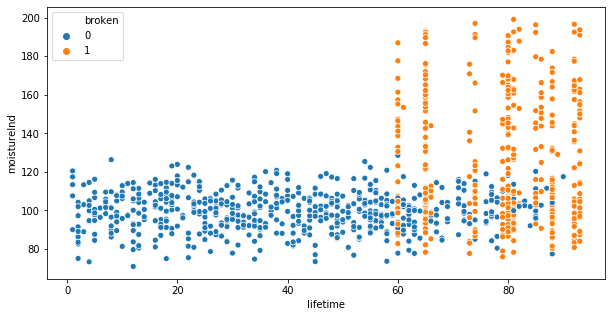

In [25]:
#numeric vs numeric vs categorical
plt.figure(figsize=(10,5))
sns.scatterplot(x='lifetime', y='moistureInd',hue='broken',data=df)
plt.show()

Note: Machine which has 60 or more lifetime and 130 moisture is surely broken. Machine reaching 130 moisture will only be happened if its lifetime is 60 or more. 

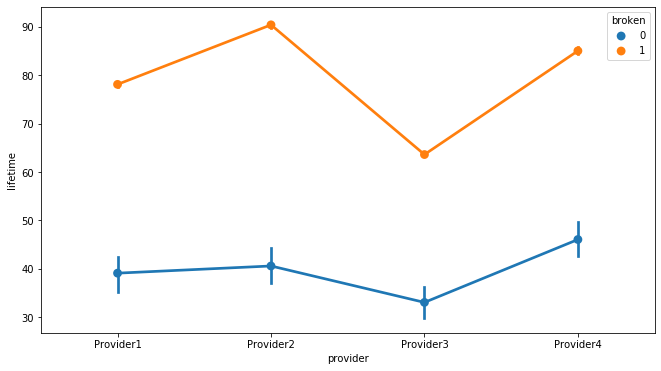

In [26]:
#numeric vs categorical vs categorical
#provider, lifetime, broken
#x=categorical, y = numeric, hue = categorical
plt.figure(figsize=(11,6))
sns.pointplot(x='provider', y='lifetime',hue='broken',data=df, order = ('Provider1','Provider2','Provider3','Provider4'))
plt.show()

Average lifetime of broken machine: provider1 = 80, provider2 = 90, provider3 = 65, provider4 = 85. The best performance among these providers based on average broken lifetime is provider2. Because it is still running after used 90 months of lifetime.
The rank of provider based on average broken lifetime:
1. Provider2
2. Provider4
3. Provider1
4. Provider3

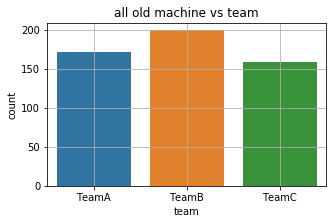

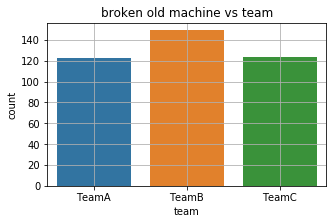

In [27]:
plt.figure(figsize=(5,3))
sns.countplot(df.team[df.lifetime>=60], order = ('TeamA','TeamB','TeamC'))
plt.title('all old machine vs team')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(df.team[df.lifetime>=60][df.broken==1], order = ('TeamA','TeamB','TeamC'))
plt.title('broken old machine vs team')
plt.grid(True)
plt.show()

In [28]:
#brokenness rate
print('teamA: ',125/160)
print('teamB: ',150/200)
print('teamC: ',125/155)

teamA:  0.78125
teamB:  0.75
teamC:  0.8064516129032258


Team B has the best performance in maintaining old machine (60 or more lifetime) with probability of running machine is 0.25.

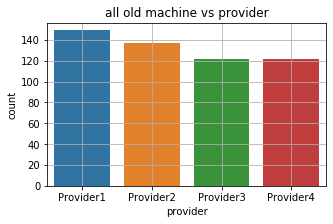

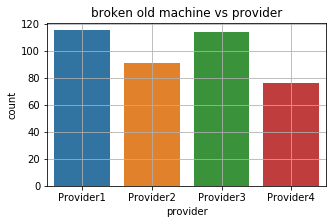

In [31]:
plt.figure(figsize=(5,3))
sns.countplot(df.provider[df.lifetime>=60], order = ('Provider1','Provider2','Provider3','Provider4'))
plt.title('all old machine vs provider')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(df.provider[df.lifetime>=60][df.broken==1], order = ('Provider1','Provider2','Provider3','Provider4'))
plt.title('broken old machine vs provider')
plt.grid(True)
plt.show()

In [30]:
#brokenness rate
print('provider1: ',115/150)
print('provider2: ',90/135)
print('provider3: ',115/120)
print('provider4: ',75/120)

provider1:  0.7666666666666667
provider2:  0.6666666666666666
provider3:  0.9583333333333334
provider4:  0.625


Provider2 and Provider4 have the best performance in old machine performances.

### 6. Conclusion

1. Machine which has both 60 lifetime or more and 130 moisture or more is surely broken.
2. Some of these old machine (lifetime>=60) still operated, as long as the moisture is kept below 130. The best team to maintain it is Team B with probability running machine is 0.25. This team should be role-model in maintaining old machine.
3. Provider2 and Provider4 are more recommended for next purchasing. Provider1 and Provider3 are less recommended.